# Klasifikacija zanrov

V prejsnjem koraku (Genre.pyb) smo v originalnem data setu (83000 pesmi) pregledali in poiskali vzorce v vseh atributih.
Po analizi, smo obdrzali le smiselne, tisti, ki so najbolj locevali zanre med sabo.

Iz vizualizacij in vzorceh je najbolj izstopala klasika, zato predvidevamo, da jo bomo najlazje locili od drugih. (Bo kasifikacijska tocnost tega zanra vecja od drugih). 

Opazili smo tudi, da bi lahko se EDM in rap po dolocenih atributih kar dobro locita od drugih zanrov. 
Najmanj vzorcev/specificnosti smo opazili pri zanru pop. V nobenem atributu ni izstopal, zato predvidevam, da bo pop tezje loziti od drugih zanrov. 

Za klasifikacijo bomo uporabili vec klasifikatorjev: 
1. Klasifikacijsko drevo 
2. KNN (n-najbljznjih sosedov)
3. Nakljucni gozdovi
4. Gradient boosting klasifikator

Na bomo med seboj primerjali njihove tocnosti.

Da bi klasifikacijsko model dobro napovedoval, more imeti klasifikacijsko tocnost vec kot nakljucno napovedovanje.

Nakjucno napovedovanje: 6 zanrov / 1 = 0.17 = 17% tocnost 

Model mora imeti kalsifikacijsko tocnost vec koy 17% da bo uporaben.

In [3]:
# Import libraries and classes required for this example:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
df_track = pd.read_csv('Data\Genre\Tracks_classification_5.csv', index_col=0)

In [5]:
print(df_track.columns)

Index(['duration_ms', 'tempo', 'loudness', 'name', 'artist_id', 'genre',
       'album_id', 'danceability', 'energy', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence'],
      dtype='object')


In [6]:
df = df_track.drop(['name', 'artist_id', 'album_id'], axis=1)
df.head()

,duration_ms,tempo,loudness,genre,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
id,,,,,,,,,,,
6lzc0Al0zfZOIFsFvBS1ki,0.197765,0.523897,0.877560,pop,0.594,0.713,0.0503,0.000328,0.000000,0.1140,0.328
4OAuvHryIVv4kMDNSLuPt6,0.138807,0.504100,0.884075,pop,0.516,0.777,0.0375,0.001080,0.000002,0.0761,0.408
3S7HNKPakdwNEBFIVTL6dZ,0.154807,0.443377,0.858431,pop,0.645,0.593,0.0288,0.034400,0.000127,0.1300,0.299
6AtZLIzUINvExIUy4QhdjP,0.136090,0.620850,0.860598,pop,0.584,0.557,0.0342,0.012900,0.000000,0.0576,0.767
3nsfB1vus2qaloUdcBZvDu,0.225276,0.749706,0.837522,pop,0.440,0.528,0.0317,0.017100,0.002030,0.2340,0.132


Podatke razdelimo na atribute s katereimo bomo napovedovali (lasnosti pesmi) ciljno spremenljivko (zanr).

In [7]:
# Assign values to the X and y variables:
Y = df.pop('genre').values
X = df.values

print(X)
print(Y)

[[1.97764625e-01 5.23897444e-01 8.77559535e-01 ... 0.00000000e+00
  1.14000000e-01 3.28000000e-01]
 [1.38806822e-01 5.04099815e-01 8.84074716e-01 ... 1.62000000e-06
  7.61000000e-02 4.08000000e-01]
 [1.54807441e-01 4.43376602e-01 8.58431222e-01 ... 1.27000000e-04
  1.30000000e-01 2.99000000e-01]
 ...
 [4.49215744e-01 3.17298234e-01 5.54239682e-01 ... 5.61000000e-01
  2.03000000e-01 3.51000000e-02]
 [2.59287974e-01 2.59747642e-01 6.04579883e-01 ... 9.27000000e-01
  1.05000000e-01 3.69000000e-02]
 [1.34709450e-01 2.98528582e-01 7.40532127e-01 ... 6.41000000e-01
  1.44000000e-01 3.35000000e-01]]
['pop' 'pop' 'pop' ... 'classical' 'classical' 'classical']


Podatke razdelimo na ucno in testno mnozico (ucna 75%, testna 25%)

In [8]:
# Split dataset into random train and test subsets:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
print("X")
print("All:", X.shape[0])
print("Train:", X_train.shape[0])
print("Test:", X_test.shape[0])
print("Y")
print("All:", Y.shape[0])
print("Train:", Y_train.shape[0])
print("Test:", Y_test.shape[0])

X
All: 81712
Train: 61284
Test: 20428
Y
All: 81712
Train: 61284
Test: 20428


In [9]:
import seaborn as sn
import matplotlib.pyplot as plt

# confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
#     sn.heatmap(confusion_matrix, annot=True)
# plt.show()
def matrix_result(Y_test, Y_predict):
    # Results: 
    plt.figure(figsize=(10,6))
    labels = pd.unique(Y_test)
    a = confusion_matrix(Y_test, Y_predict, labels=labels)
    df1 = pd.DataFrame(a, index=labels, columns=labels)
    hm = sn.heatmap(df1, annot=True, fmt='g', cmap="rocket", linewidths=0.5, linecolor="White")
    return hm

In [10]:
scores = []

In [11]:
# Nakljucna klasifikacija... 6 zanrov ... 1/6 = 17%
# Klasifikacijski model more npovedovati boljse, kot s 17% pravilnostjo!
scores.append(0.17)

# Decision Tree

In [85]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train) 

# Predict y data with classifier: 
Y_predict = classifier.predict(X_test)

Text(0.5, 1.0, 'Decision Tree')

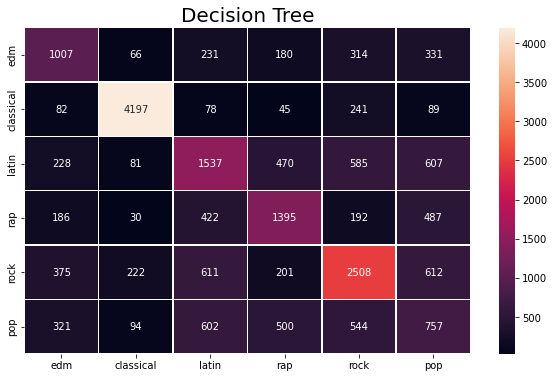

In [91]:
axes = matrix_result(Y_test, Y_predict)
axes.set_title("Decision Tree", fontsize=20)

In [93]:
print(classification_report(Y_test, Y_predict)) 

              precision    recall  f1-score   support

   classical       0.89      0.89      0.89      4732
         edm       0.46      0.47      0.47      2129
       latin       0.44      0.44      0.44      3508
         pop       0.26      0.27      0.27      2818
         rap       0.50      0.51      0.51      2712
        rock       0.57      0.55      0.56      4529

    accuracy                           0.56     20428
   macro avg       0.52      0.52      0.52     20428
weighted avg       0.56      0.56      0.56     20428



In [94]:
scores.append(precision_score(Y_test, Y_predict, average='weighted'))

# k-nearest neighbors (KNN)

In [95]:
# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train) 

# Predict y data with classifier: 
Y_predict = classifier.predict(X_test)

Text(0.5, 1.0, 'KNN')

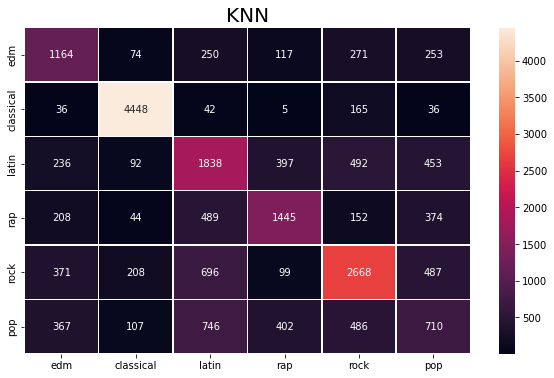

In [96]:
axes = matrix_result(Y_test, Y_predict)
axes.set_title("KNN", fontsize=20)

In [97]:
print(classification_report(Y_test, Y_predict)) 

              precision    recall  f1-score   support

   classical       0.89      0.94      0.92      4732
         edm       0.49      0.55      0.52      2129
       latin       0.45      0.52      0.49      3508
         pop       0.31      0.25      0.28      2818
         rap       0.59      0.53      0.56      2712
        rock       0.63      0.59      0.61      4529

    accuracy                           0.60     20428
   macro avg       0.56      0.56      0.56     20428
weighted avg       0.60      0.60      0.60     20428



In [98]:
scores.append( precision_score(Y_test, Y_predict, average='weighted'))

# Random forest

In [99]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, Y_train) 

# Predict y data with classifier: 
Y_predict = classifier.predict(X_test)

Text(0.5, 1.0, 'Random Forest')

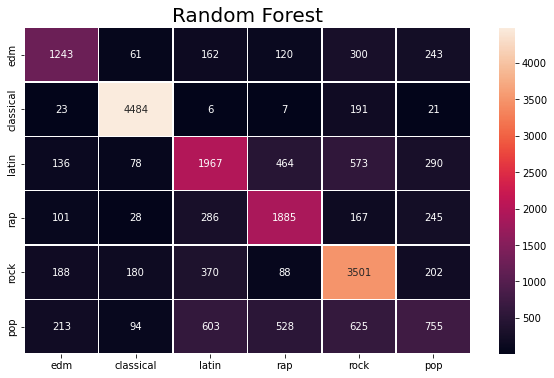

In [100]:
axes = matrix_result(Y_test, Y_predict)
axes.set_title("Random Forest", fontsize=20)

In [101]:
print(classification_report(Y_test, Y_predict)) 

              precision    recall  f1-score   support

   classical       0.91      0.95      0.93      4732
         edm       0.65      0.58      0.62      2129
       latin       0.58      0.56      0.57      3508
         pop       0.43      0.27      0.33      2818
         rap       0.61      0.70      0.65      2712
        rock       0.65      0.77      0.71      4529

    accuracy                           0.68     20428
   macro avg       0.64      0.64      0.63     20428
weighted avg       0.66      0.68      0.67     20428



In [102]:
scores.append(precision_score(Y_test, Y_predict, average='weighted'))

# Gradient Boosting Classifier

In [103]:
# n = 100 test
classifier = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1)
classifier.fit(X_train, Y_train) 

# Predict y data with classifier: 
Y_predict = classifier.predict(X_test)

Text(0.5, 1.0, 'Gradient Boosting Classifier')

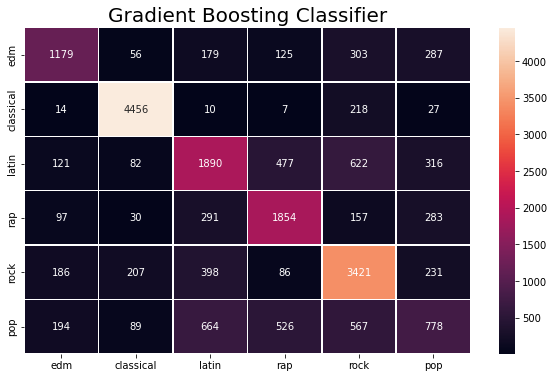

In [108]:
axes = matrix_result(Y_test, Y_predict)
axes.set_title("Gradient Boosting Classifier", fontsize=20)

In [105]:
print(classification_report(Y_test, Y_predict)) 

              precision    recall  f1-score   support

   classical       0.91      0.94      0.92      4732
         edm       0.66      0.55      0.60      2129
       latin       0.55      0.54      0.54      3508
         pop       0.40      0.28      0.33      2818
         rap       0.60      0.68      0.64      2712
        rock       0.65      0.76      0.70      4529

    accuracy                           0.66     20428
   macro avg       0.63      0.62      0.62     20428
weighted avg       0.65      0.66      0.65     20428



In [106]:
scores.append(precision_score(Y_test, Y_predict, average='weighted'))

In [109]:
classifiers = ["Random", "Decision Tree", "KNN", "Random Forest", "Gradient Boosting"]
print("Classifiers accurucy")
for index, cls in enumerate(classifiers):
    print("%s: %.2f" % (cls, scores[index]))

Classifiers accurucy
Random: 0.17
Decision Tree: 0.56
KNN: 0.60
Random Forest: 0.66
Gradient Boosting: 0.65


In [18]:
def matrix_result_all(Y_test, Y_predict, ax, cbar_ax):
    # Results: 
    plt.figure(figsize=(20,10))
    labels = ['edm', 'classical', 'latin', 'rap', 'rock', 'pop']
    a = confusion_matrix(Y_test, Y_predict, labels=labels)
    df1 = pd.DataFrame(a, index=labels, columns=labels)
    hm = sn.heatmap(df1, annot=True, fmt='g', cmap="rocket", linewidths=0.5, linecolor="White", ax=ax, cbar_ax=cbar_ax)

def plot_all(path):
    df_track = pd.read_csv(path, index_col=0)
    df = df_track.drop(['name', 'artist_id', 'album_id'], axis=1)
    
    Y = df.pop('genre').values
    X = df.values
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
    
    fig, axes = plt.subplots(2,2, figsize=(14, 10))
    cbar_ax = fig.add_axes([.95, .2, .03, .6])
    ax1 = axes[0, 0]
    ax2 = axes[0, 1]
    ax3 = axes[1, 0]
    ax4 = axes[1, 1]
    print("Classifiers accuracy")
    
    # ------------ Decision tree --------------
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, Y_train) 

    # Predict y data with classifier: 
    Y_predict = classifier.predict(X_test) 
    ac = precision_score(Y_test, Y_predict, average='weighted')
    k = matrix_result_all(Y_test, Y_predict, ax1, cbar_ax)
    ax1.set_title('Decision Tree', fontsize=18)
    print("Decision Tree: %.2f (%.f%%)" % (ac, ac*100))

    #  -------------- KNN --------------
    # Use the KNN classifier to fit data:
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train, Y_train) 

    # Predict y data with classifier: 
    Y_predict = classifier.predict(X_test)
    ac = precision_score(Y_test, Y_predict, average='weighted')
    k = matrix_result_all(Y_test, Y_predict, ax2, cbar_ax)
    ax2.set_title('KNN', fontsize=18)
    print("KNN: %.2f (%.f%%)" % (ac, ac*100))
    
    # -------------- Random forest --------------
    classifier = RandomForestClassifier(n_estimators=100)
    classifier.fit(X_train, Y_train) 

    # Predict y data with classifier: 
    Y_predict = classifier.predict(X_test)
    ac_r = classification_report(Y_test, Y_predict)
    ac = precision_score(Y_test, Y_predict, average='weighted')
    k = matrix_result_all(Y_test, Y_predict, ax3, cbar_ax)
    ax3.set_title('Random Forest', fontsize=18)
    print("Random Forest: %.2f (%.f%%)" % (ac, ac*100))
    
    #  -------------- Gradian boosting classifer  --------------
    # n = 100 test
    classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
    classifier.fit(X_train, Y_train) 

    # Predict y data with classifier: 
    Y_predict = classifier.predict(X_test)
    ac = precision_score(Y_test, Y_predict, average='weighted')
    k = matrix_result_all(Y_test, Y_predict, ax4, cbar_ax)
    ax4.set_title('Gradient Boosting', fontsize=18)
    print("Gradient Boosting: %.2f (%.f%%)" % (ac, ac*100))
    
    print()
    print("Random Forest")
    print(ac_r) 
    

Classifiers accuracy
Decision Tree: 0.56 (56%)
KNN: 0.59 (59%)
Random Forest: 0.67 (67%)
Gradient Boosting: 0.66 (66%)

Random Forest
              precision    recall  f1-score   support

   classical       0.91      0.95      0.93      4704
         edm       0.68      0.58      0.62      2205
       latin       0.59      0.57      0.58      3479
         pop       0.41      0.27      0.33      2782
         rap       0.63      0.69      0.66      2775
        rock       0.65      0.78      0.71      4483

    accuracy                           0.68     20428
   macro avg       0.64      0.64      0.64     20428
weighted avg       0.67      0.68      0.67     20428



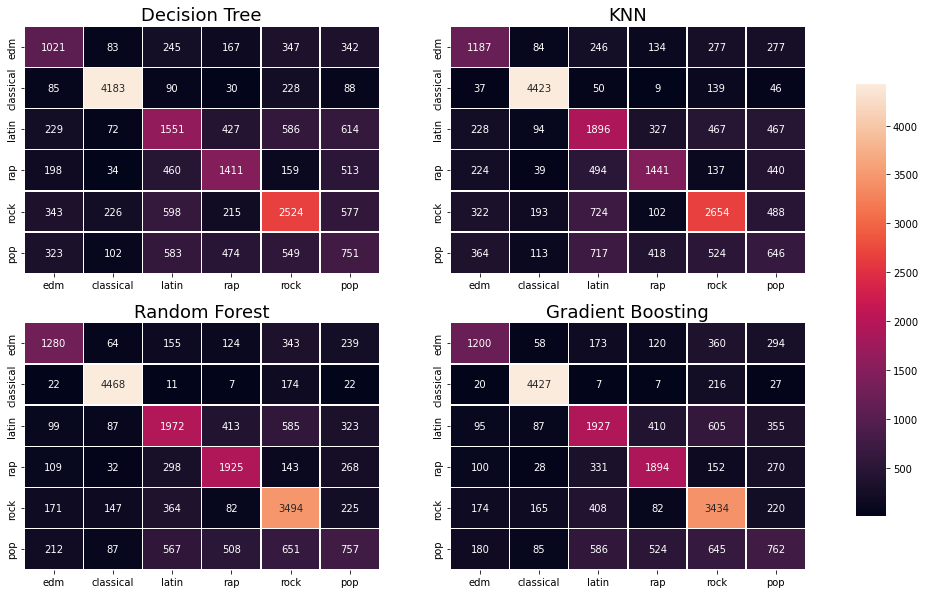

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [19]:
plot_all('Data\Genre\Tracks_classification_5.csv')

REZULTATI:

Kot smo predvidevali, klasifikatorji najnatancnejse uvrscajo pesmi klasike, ker je seveda najbolj drugacna od drugih zanrov. 
Klasifikacijska tocnost klasike je 93%. Vidimo, da je 2. najbolj tocno napovedan zanr rock s tocnostjo 70%, opazimo tudi, da je v rock zanr napacno napovedanih najvec pesmi iz zanra pop in latin. Po natancnosti za rockom sledi rap s 67% natancnostjo, isto kot pri rocku vidimo tudi pri rapu, da je najvec napacno napovedanih pesmi iz zanra pop in latin.

Sledita EDM z natancnostjo 60% in latino z natancnostjo 57%. Opazimo, da imam pop najmanjso natanconst 33%. Ze iz vizualizacije smo ugotovilo, da bomo pop locili od drugih zanrov tezko, ker nikjer ne izstopa (se razlikuje od drugih zanrov). Zdaj lahko potrdimo, da je pop najtezje napovedati od vseh zanrov, ker ima lastnosti vseh drugih zanrov. 

KLASIFIKATORJI:
  
Primerjamo se klasifikatorje med seboj. Opazimo, da KNN klasifikacija za 3% bolje napoveduje kot odlocitveno drevo. Najvecjo izboljsavo opazimo pri napovedovanju latino pesmi. Se vecjo razliko o tocnosti napovedovanja opazimo pri Nakljucnih gozdovih. V primerjavi s KNN nakljucni gozdovi veliko bolje napovedujejo pesmi rocka in rapa.

Gradient boosting kalsifikator pa je po natancnosti blizu klasifikatorju nakljucnih gozdovih, amapak je za izvedbo veliko bolj casovno zahteven.

Gradient boosting trees can be more accurate than random forests. Because we train them to correct each other's errors, they're capable of capturing complex patterns in the data. However, if the data are noisy, the boosted trees may overfit and start modeling the noise.